# Importamos las librerías necesarias

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Cargamos el Dataset

In [55]:
df = pd.read_csv('Weather Data.csv')

In [56]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# Exploramos los tipos de datos que contiene nuestro Dataset

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


Como puede observarse tenemos columnas que poseen datos de tipo objeto, flotante y entero. Lo primero que debemos preguntarnos es si la asignación de estos datos es correcta. En general, la asignación de estos datos parece ser correcta, con excepción de la columna Date/Time. Este tipo de dato debería ser de tipo DateTime. Por otro lado no tenemos valores nulos en nuestro DataFrame.

## Cambiamos la columna Date/Time por tipo de dato DateTime

In [58]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format='%m/%d/%Y %H:%M')

Ahora vamos a convertir a la columna de fecha en el índice de nuestro DataFrame

In [59]:
df.set_index('Date/Time', inplace=True)
df.sort_index(inplace=True)

Observamos que se haya producido el cambio

In [60]:
df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...
2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow


Ahora, exploremos un poco la columna 'Weather'

In [61]:
for i in df['Weather'].unique():
    print(i)

Fog
Freezing Drizzle,Fog
Mostly Cloudy
Cloudy
Rain
Rain Showers
Mainly Clear
Snow Showers
Snow
Clear
Freezing Rain,Fog
Freezing Rain
Freezing Drizzle
Rain,Snow
Moderate Snow
Freezing Drizzle,Snow
Freezing Rain,Snow Grains
Snow,Blowing Snow
Freezing Fog
Haze
Rain,Fog
Drizzle,Fog
Drizzle
Freezing Drizzle,Haze
Freezing Rain,Haze
Snow,Haze
Snow,Fog
Snow,Ice Pellets
Rain,Haze
Thunderstorms,Rain
Thunderstorms,Rain Showers
Thunderstorms,Heavy Rain Showers
Thunderstorms,Rain Showers,Fog
Thunderstorms
Thunderstorms,Rain,Fog
Thunderstorms,Moderate Rain Showers,Fog
Rain Showers,Fog
Rain Showers,Snow Showers
Snow Pellets
Rain,Snow,Fog
Moderate Rain,Fog
Freezing Rain,Ice Pellets,Fog
Drizzle,Ice Pellets,Fog
Drizzle,Snow
Rain,Ice Pellets
Drizzle,Snow,Fog
Rain,Snow Grains
Rain,Snow,Ice Pellets
Snow Showers,Fog
Moderate Snow,Blowing Snow


Podemos apreciar que contiene varios valores. Ahora, nuestro objetivo con este proyecto es generar un modelo de Machine Learning que nos permita predecir si va a llover o no. Para poder llevar esto adelante vamos a crear una columna que se va a llamar 'Rain'. La misma va a contener el valor 1 si en la descripción de la columna 'Weather' nos encontramos que se contiene la palabra Rain. De lo contrario contendrá un 0.

In [62]:
#Estandarizamos los valores de la columna 'Weather' a minúscula
df['Weather'] = df['Weather'].apply(lambda x: x.lower())

In [63]:
#Creamos la columna 'Rain' a partir de un filtro de nuestro DataFrame
#Le damos el valor 1 si la columna 'Weather' contiene la palabra 'rain'
df.loc[df['Weather'].str.contains('rain'), 'Rain'] = 1
#Caso de que tal columna no contenga 'rain' le damos el valor de 0
df.loc[df['Rain']!=1, 'Rain'] = 0

# Breve análisis de los datos

## La columna 'Temp_C'

Graficamos esta columna

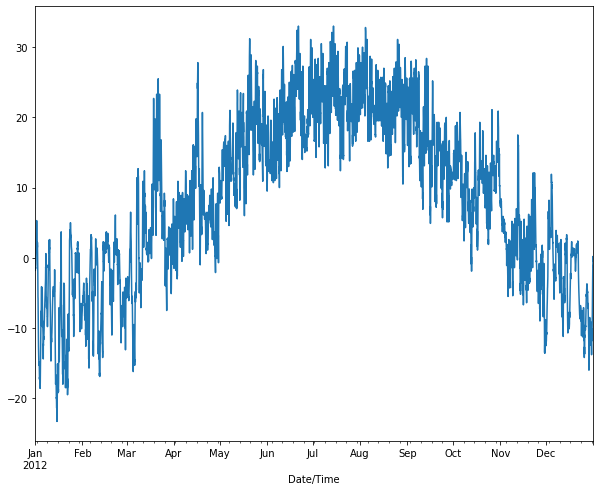

In [64]:
plt.figure(figsize=(10,8))
df['Temp_C'].plot()
plt.show()

A grandes rasgos podemos observar que los meses más caliente del DataFramen se encontraron entre mitad de Mayo y mitad de septiembnre. Probablemente este Dataset tome datos de alguna región del hemisferio Norte, ya que las fechas indicadas coinciden bastante con el período de verano de tal hemisferio. Por otro lado, los meses más fríos fueron de enero a marzo, aunque Diciembre también fué un mes frío.

In [65]:
tem_mas_baja = df['Temp_C'].min()
tem_mas_alta = df['Temp_C'].max()

print(f'La temperatura más baja registrada en el DataFrame fué de {tem_mas_baja}º, mientras que la más alta fué de {tem_mas_alta}')

La temperatura más baja registrada en el DataFrame fué de -23.3º, mientras que la más alta fué de 33.0


In [66]:
tem_media = df['Temp_C'].mean()
tem_mediana = df['Temp_C'].median()

print(f'La temperatura media del DataFrame fué de {round(tem_media, 2)}º, mientras que la mediana fué de {tem_mediana}º')

La temperatura media del DataFrame fué de 8.8º, mientras que la mediana fué de 9.3º


Hagamos un resampleo del DataFrame y observemos de qué manera fué modificandose la temperatura media y mediana cada mes.

In [67]:
resampleado_1m_media = df.resample('1m').mean()
resampleado_1m_mediana = df.resample('1m').median()

Grafiquemos estos datos relativos a la temperatura

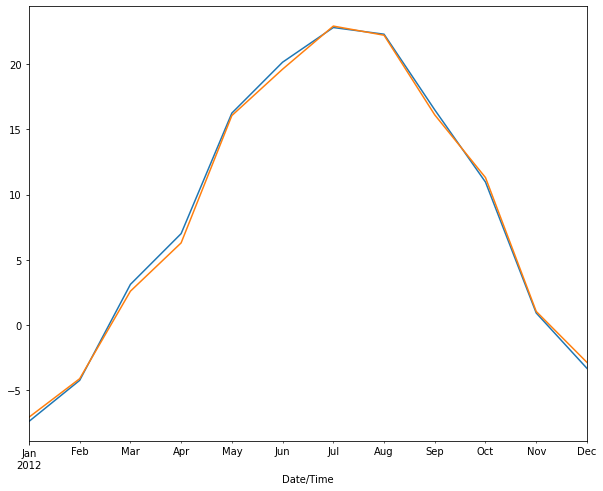

In [68]:
plt.figure(figsize=(10,8))
resampleado_1m_media['Temp_C'].plot()
resampleado_1m_mediana['Temp_C'].plot()
plt.show()

## La columna 'Dew Point Temp_C'

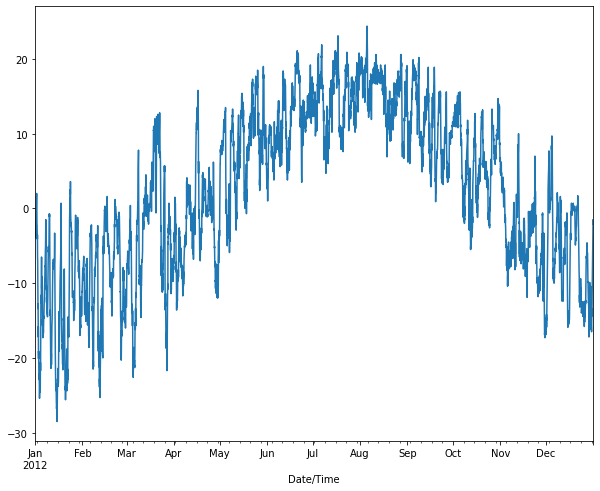

In [69]:
plt.figure(figsize=(10,8))
df['Dew Point Temp_C'].plot()
plt.show()

Estos datos parecen bastante similares a los de la columna anterior. Por ello, para observar si existe alguna diferencia vamos a graficar ambas columnas con diferentes colores.

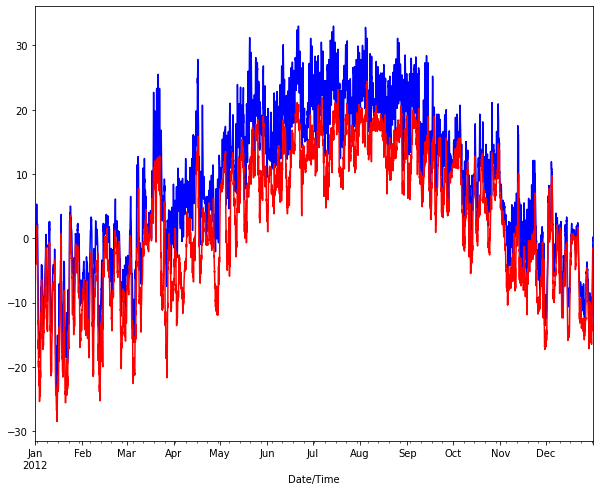

In [70]:
plt.figure(figsize=(10,8))
#Graficamos la columna de temperatura en grados Celsius en color azul
df['Temp_C'].plot(color='blue')
#Graficamos la columna de temperatura de punto de rocío en rojo
df['Dew Point Temp_C'].plot(color='red')
plt.show()

De aquí podemos observar que existe una clara relación entre ambas temperaturas, la diferencia es que la temperatura de punto de rocío tiende a ser más baja que la temperatura en grados Celsius. Ahora bien, resulta claro que la temperatura de punto de rocío es bastante semejante a la temperatura en grados Celsius en los meses de verano.

¿Existe algún caso en el que la temperatura de punto de rocio fue mayor a la temperatura normal?

In [71]:
df[df['Dew Point Temp_C']>df['Temp_C']]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Rain
Date/Time,,,,,,,,


Vemos que obtenemos un DataFrame vacío por lo que a nuestra anterior pregunta debemos responder que no existe tal caso.

¿Tenemos casos en los que la temperatura ambiente sea igual a la temperatura de punto de rocío?

In [72]:
df[df['Dew Point Temp_C']==df['Temp_C']]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Rain
Date/Time,,,,,,,,
2012-03-17 10:00:00,2.6,2.6,100,0,0.2,102.37,fog,0.0
2012-09-30 20:00:00,11.6,11.6,100,9,8.0,100.00,"rain,fog",1.0
2012-10-02 06:00:00,11.2,11.2,100,0,48.3,100.96,mostly cloudy,0.0
2012-10-03 05:00:00,11.0,11.0,100,11,3.2,101.38,fog,0.0
2012-10-03 06:00:00,11.5,11.5,100,11,0.6,101.42,fog,0.0
2012-10-03 07:00:00,11.7,11.7,100,13,0.6,101.49,fog,0.0
2012-10-03 08:00:00,11.4,11.4,100,15,1.6,101.54,fog,0.0
2012-10-04 20:00:00,14.1,14.1,100,4,9.7,101.10,fog,0.0
2012-10-20 06:00:00,10.6,10.6,100,4,0.4,99.87,fog,0.0


Parecería ser que en la mayoría de los casos, siempre que la temperatura ambiente iguala a la temperatura de punto de rocío el clima presenta niebla (*fog*). Observemos si esta afirmación es correcta.

In [73]:
df[(df['Dew Point Temp_C']!=df['Temp_C'])&(df['Weather'].str.contains('fog'))]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Rain
Date/Time,,,,,,,,
2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,fog,0.0
2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,fog,0.0
2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"freezing drizzle,fog",0.0
2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"freezing drizzle,fog",0.0
2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,fog,0.0
...,...,...,...,...,...,...,...,...
2012-12-30 03:00:00,-9.1,-10.4,90,11,3.6,100.30,"snow,fog",0.0
2012-12-30 04:00:00,-9.3,-10.6,90,13,9.7,100.28,"snow,fog",0.0
2012-12-30 05:00:00,-9.1,-10.4,90,11,4.0,100.32,"snow,fog",0.0


Vemos que existen situaciones en las que la temperatura ambiente es diferente a la temperatura de punto de rocío y, sin embargo, el clima presenta niebla. En otras palabras, no es necesario la equivalencia entre estas dos temperaturas para que el clima presente niebla.

¿Cuáles fueron las temperaturas máximas y mínimas de punto de rocío en nuestro DataFrame?

In [74]:
rocio_tem_min = df['Dew Point Temp_C'].min()
rocio_tem_max = df['Dew Point Temp_C'].max()

print(f'La temperatura de punto rocío máxima fué de {rocio_tem_max}º, mientras que la mínima fué de {rocio_tem_min}')

La temperatura de punto rocío máxima fué de 24.4º, mientras que la mínima fué de -28.5


## La columna 'Rel Hum_%'

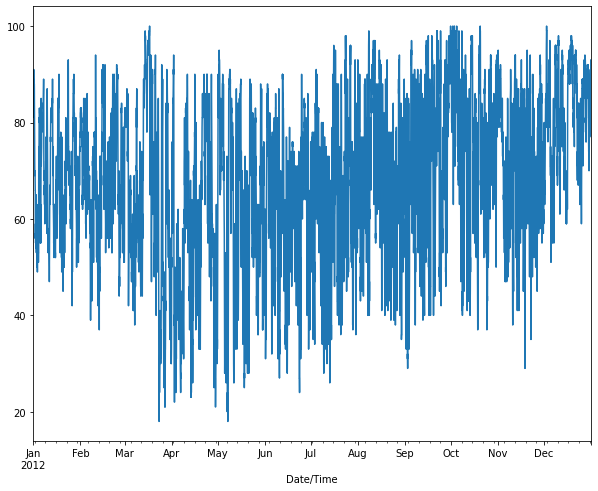

In [75]:
plt.figure(figsize=(10,8))
df['Rel Hum_%'].plot()
plt.show()

¿Existirá algún tipo de relación entre la humedad y la lluvia? Intuitivamente, la mayoría de nosotros sabemos que sí. De hecho, para que sea posible la lluvia la humedad tiene que llegar en algún punto al 100%. Veamos esto con gráficas.

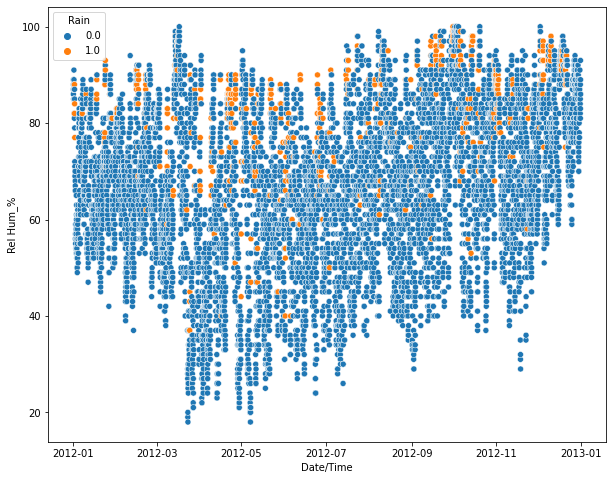

In [76]:
#Grafica por fechas
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x=df.index, y='Rel Hum_%', hue='Rain')
plt.show()

Parecería ser que la mayor cantidad de casos de lluvia se concentran por encima del 80% de humedad. Testiemos esta hipótesis.

In [77]:
lluvia_mayor_80 = df[(df['Rain']==1)&(df['Rel Hum_%']>80)].shape[0]
lluvia_menor_80 = df[(df['Rain']==1)&(df['Rel Hum_%']<=80)].shape[0]

print(f'Los casos de lluvia con un porcentaje de humedad mayor al 80% son {lluvia_mayor_80}, mientras que aquellos menor o igual a 80% son {lluvia_menor_80}')

Los casos de lluvia con un porcentaje de humedad mayor al 80% son 481, mientras que aquellos menor o igual a 80% son 208


Es decir, más del doble de casos de lluvia se encuentra cuando la humedad es mayor 80%

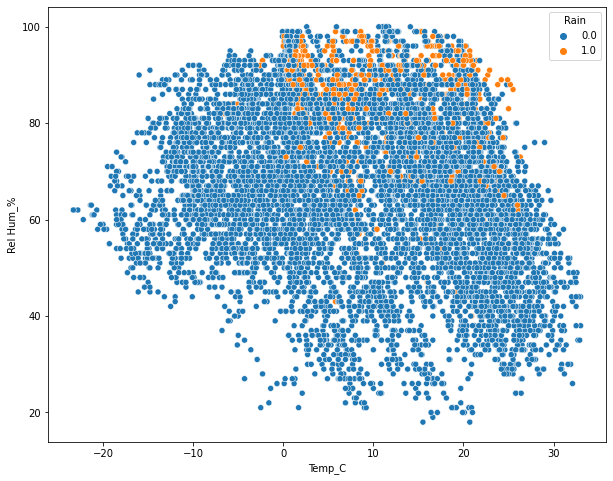

In [78]:
#Gráfica de Temperatura ambiente y porcentaje de humedad
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Temp_C', y='Rel Hum_%', hue='Rain')
plt.show()

La temperatura parece ser un elemento a tener en cuenta también, ya que la mayor cantidad de casos de lluvia suceden cuando la temperatura es mayor a 0º. Demostremos esto con datos.

In [79]:
lluvia_temp_mayor_cero = df[(df['Temp_C']>0)&(df['Rain']==1)].shape[0]
lluvia_temp_menor_cero = df[(df['Temp_C']<=0)&(df['Rain']==1)].shape[0]

print(f'La cantidad de casos de lluvia con temperatura mayor a 0º es de {lluvia_temp_mayor_cero}, mientras que los casos de lluvia con temperatura menor a cero es de {lluvia_temp_menor_cero}')

La cantidad de casos de lluvia con temperatura mayor a 0º es de 668, mientras que los casos de lluvia con temperatura menor a cero es de 21


¿Qué sucederá con el punto de rocío?

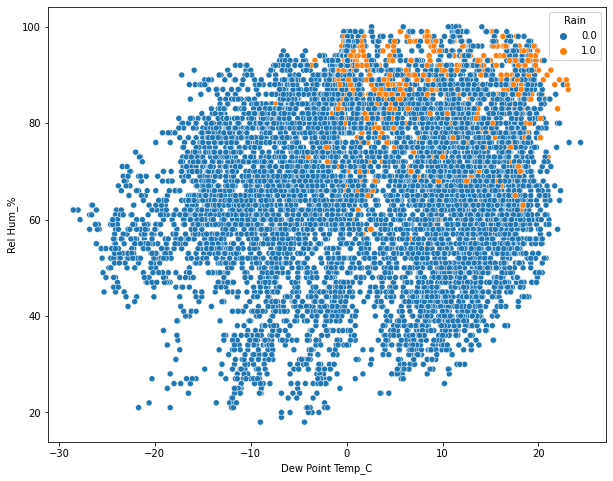

In [80]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Dew Point Temp_C', y='Rel Hum_%', hue='Rain')
plt.show()

A los fines de este análisis las columnas 'Wind Speed_km/h' y 'Visibility_km' no serán tenidas en cuenta, ya que estas parecen ser un efecto que se produce por las otras. 

## La columna 'Press_kPa'

Graficamos esta columna

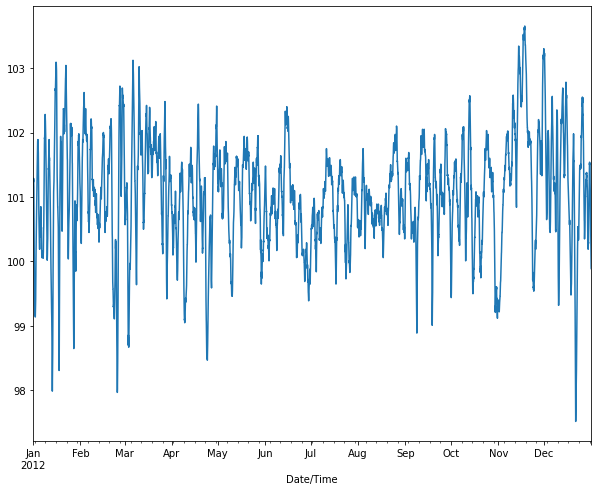

In [81]:
plt.figure(figsize=(10,8))
df['Press_kPa'].plot()
plt.show()

¿Están relacionados la presión y la lluvia?

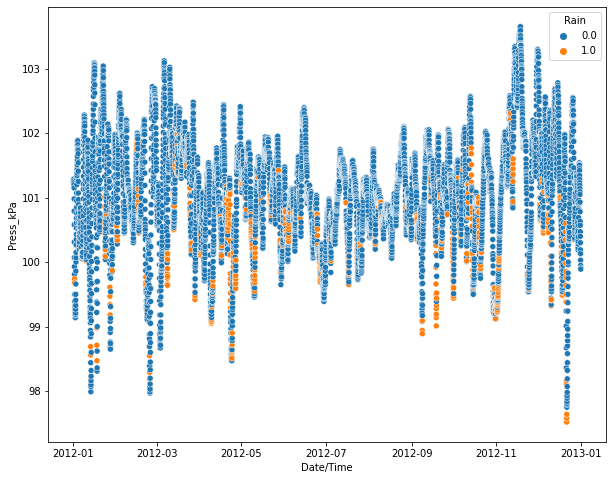

In [82]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x=df.index, y='Press_kPa', hue='Rain')
plt.show()

No parece haber una relación clara entre presión y el hecho de que llueva. De hecho, se presentan lluvias tanto para presiones altas, como bajas.

La misma pregunta podemos hacernos para las columnas 'Temp_C', 'Dew Point Temp_C' y 'Rel Hum_%'. Vamos a realizar un gráfico para cada una de ellas, pero automatizaremos la tarea utilizando un bucle.

Gráfico para la columna Temp_C


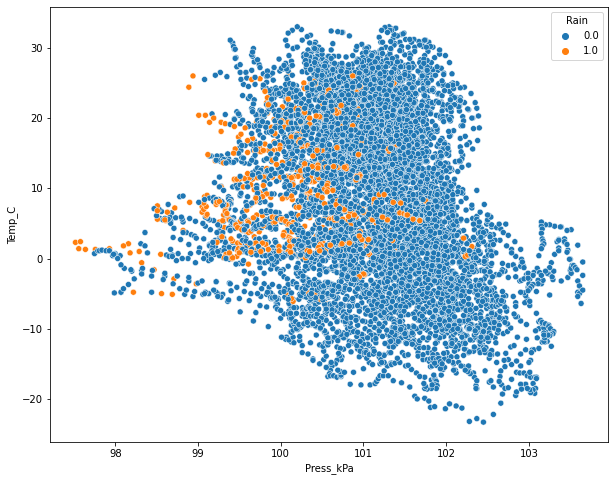

********************************
Gráfico para la columna Dew Point Temp_C


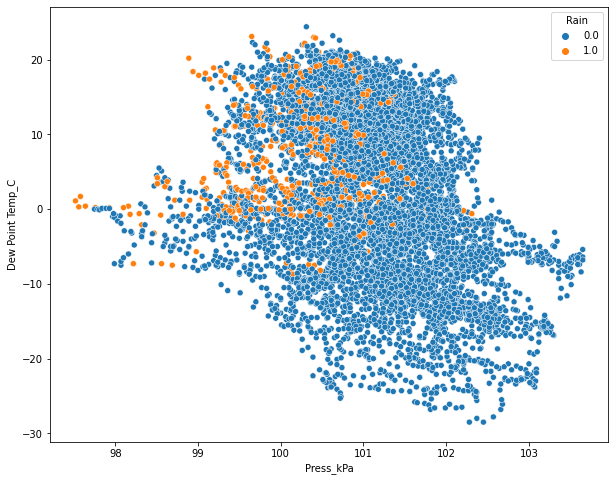

********************************
Gráfico para la columna Rel Hum_%


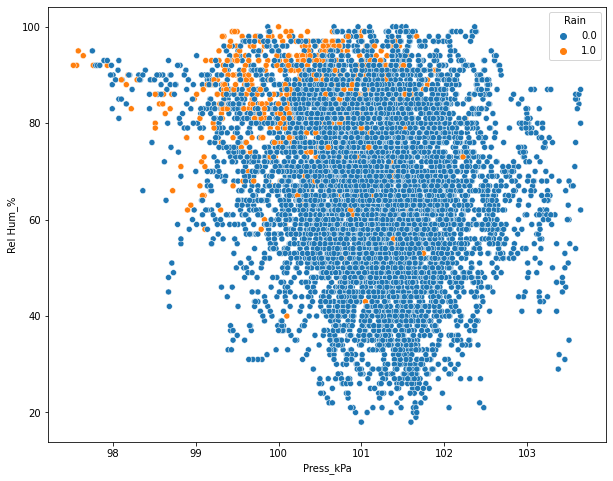

********************************


In [83]:
columnas = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%']

for i in columnas:
    print(f'Gráfico para la columna {i}')
    plt.figure(figsize=(10,8))
    sns.scatterplot(data=df, x='Press_kPa', y=i, hue='Rain')
    plt.show()
    print('********************************')

En los primeros dos gráficos no parece darse una relación entre las variables. No obstante, el último gráfico nos muestra un hecho interesante. La mayor cantidad de casos de lluvia parece agruparse cuando la humedad relativa es mayor al 80% y la presión en kPa es menor a 101. Esto se debe a que el aire está más cerca de su punto de saturación (*i.e.* no puede contener más agua) y que hay menos aire sobre la superficie de la Tierra para absorber el agua líquida.

## La columna 'Rain'

Una pregunta que podríamos realizarnos es determinar en qué mes se dió la mayor cantidad de lluvias. Lo primero que vamos a realizar es resamplear nuestro DataFrame para que nos registre los días. Como nos interesa saber si llovió o no en ese día vamos a aplicarle el método max. En tal caso, si en algún momento de la jornada llovió, la columna 'Rain' sería igual a 1 en nuestro nuevo DataFrame

In [84]:
resampleado_1d_max = df.resample('1d').max()
resampleado_1d_max

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Rain
Date/Time,,,,,,,,
2012-01-01,5.3,2.0,91,30,25.0,101.29,rain showers,1.0
2012-01-02,5.2,1.5,77,48,25.0,100.27,snow showers,1.0
2012-01-03,-9.0,-15.8,65,33,25.0,101.87,snow showers,0.0
2012-01-04,-7.6,-11.6,79,17,25.0,101.89,snow,0.0
2012-01-05,-4.1,-6.5,83,26,48.3,100.85,snow,0.0
...,...,...,...,...,...,...,...,...
2012-12-27,-3.7,-4.6,94,48,25.0,101.46,"snow,blowing snow",0.0
2012-12-28,-4.2,-5.7,93,30,48.3,101.38,snow,0.0
2012-12-29,-8.5,-9.9,92,26,25.0,101.35,"snow,fog",0.0


In [85]:
for i in range(1, 13):
    cantidad_lluvia = resampleado_1d_max.loc[(resampleado_1d_max.index.month==i)&(resampleado_1d_max['Rain']==1), 'Rain'].count()

    print(f'En el mes {i} se registraron {cantidad_lluvia}  lluvias')

En el mes 1 se registraron 10  lluvias
En el mes 2 se registraron 8  lluvias
En el mes 3 se registraron 11  lluvias
En el mes 4 se registraron 13  lluvias
En el mes 5 se registraron 17  lluvias
En el mes 6 se registraron 15  lluvias
En el mes 7 se registraron 11  lluvias
En el mes 8 se registraron 13  lluvias
En el mes 9 se registraron 10  lluvias
En el mes 10 se registraron 17  lluvias
En el mes 11 se registraron 8  lluvias
En el mes 12 se registraron 9  lluvias


De aquí se deduce que dos meses tuvieron la **mayor** cantidad de jornadas de lluvia: mayo y octubre. Ahora bien, la **menor** cantidad de días lluviosos se dieron en febrero y septiembre.

¿Cuántos días lluviosos se tuvieron en el año?

In [86]:
dias_lluviosos = resampleado_1d_max[resampleado_1d_max['Rain']==1].shape[0]
dias_sin_lluvia = resampleado_1d_max[resampleado_1d_max['Rain']==0].shape[0]
print(f'La cantidad de días lluviosos en el año fué de {dias_lluviosos}, mientras que la cantidad de días sin lluvia fué de {dias_sin_lluvia}')

La cantidad de días lluviosos en el año fué de 142, mientras que la cantidad de días sin lluvia fué de 224


Graficamente esto puede expresarse de la siguiente manera

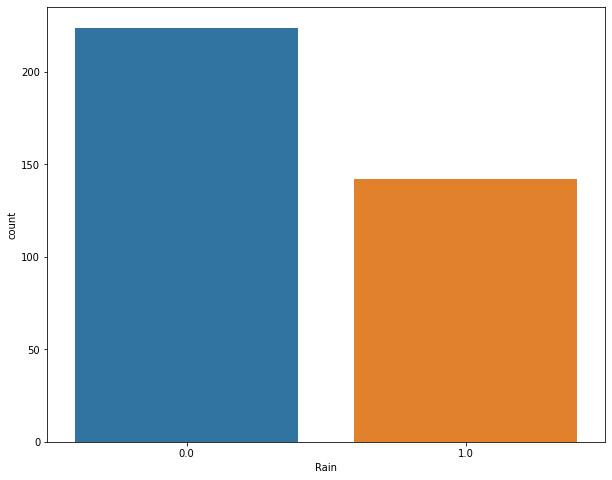

In [87]:
plt.figure(figsize=(10,8))
sns.countplot(x=resampleado_1d_max['Rain'])
plt.show()

# Creando un modelo de Machine Learning para predecir la lluvia

Para entrenar a nuestro a nuestro modelo vamos a aplicar la técnica de sub-muestreo. Es decir, con los datos que disponemos vamos a crear un nuevo DataFrame compuesto por un 50% de entradas en las que se registra lluvia y otro 50% por entradas que no registran lluvia.

In [88]:
#Veamos la cantidad de registro con y sin lluvia
df['Rain'].value_counts()

0.0    8095
1.0     689
Name: Rain, dtype: int64

Ahora sabemos la cantidad de registros que tiene que tener nuestro filtro de asistencias sin lluvia.

In [89]:
#Filtrando el DataFrame
con_lluvia = df[df['Rain']==1]
sin_lluvia = df[df['Rain'] == 0].iloc[0:con_lluvia.shape[0]]

concatenado = pd.concat([con_lluvia, sin_lluvia])

Graficamos la distribución de los registros con y sin lluvia.

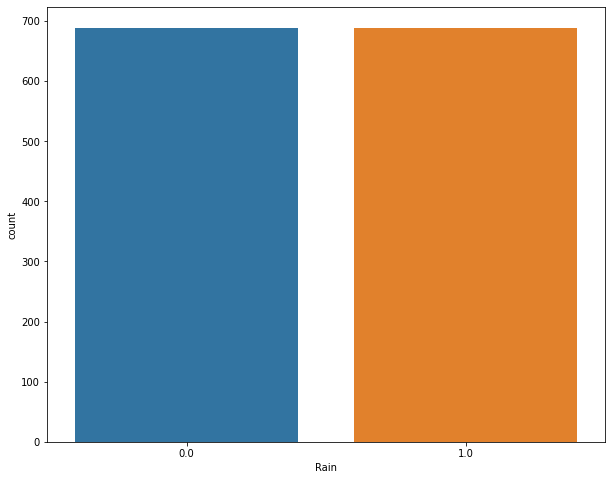

In [90]:
plt.figure(figsize=(10,8))
sns.countplot(data=concatenado, x='Rain')
plt.show()

Vemos que tenemos la misma cantidad de registros para nuestro nuevo DataFrame.

In [91]:
nuevo_df = concatenado

Como vimos anteriormente, parecería ser que las columnas más adecuadas para predecir si lloverá o no son las de 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Press_kPa'. Estas van a ser nuestros valores de entrada, mientras que el valor de salida será la columna 'Rain'.

## Knn vecinos

### Escalado con RobustScaler

In [92]:
#Asignamos variables a los datos de entrada y el de salida
X = nuevo_df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Press_kPa']].values
y = nuevo_df['Rain'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Escalamos los datos
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_neighbors = 3

#Establecemos nuestro modelo
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Precisión del clasificador KNN en el conjunto de entrenamiento: {:.2f}'.format(knn.score(X_train, y_train)))
print('Precisión del clasificador KNN en el conjunto de prueba: {:.2f}'.format(knn.score(X_test, y_test)))

Precisión del clasificador KNN en el conjunto de entrenamiento: 0.97
Precisión del clasificador KNN en el conjunto de prueba: 0.96


#### Eligiendo el mejor 'n_neighbors'

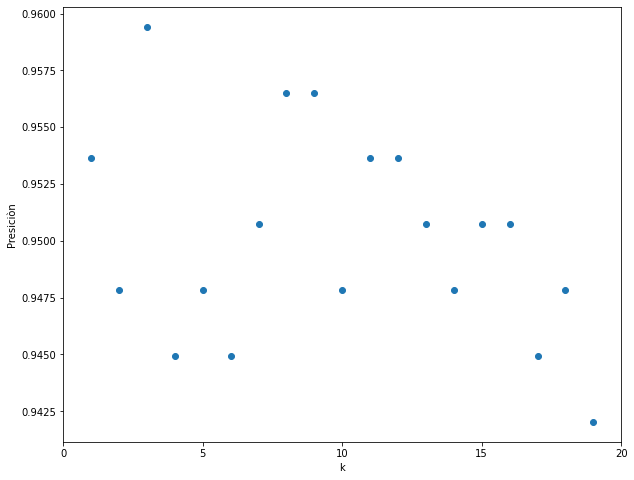

In [93]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(10,8))
plt.xlabel('k')
plt.ylabel('Presiciòn')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

### Escalado con StandardScaler 

In [94]:
#Asignamos variables a los datos de entrada y el de salida
X = nuevo_df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Press_kPa']].values
y = nuevo_df['Rain'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Escalamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n_neighbors = 6
#Establecemos nuestro modelo
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Precisión del clasificador KNN en el conjunto de entrenamiento: {:.2f}'.format(knn.score(X_train, y_train)))
print('Precisión del clasificador KNN en el conjunto de prueba: {:.2f}'.format(knn.score(X_test, y_test)))

Precisión del clasificador KNN en el conjunto de entrenamiento: 0.96
Precisión del clasificador KNN en el conjunto de prueba: 0.96


#### Eligiendo el mejor vecino

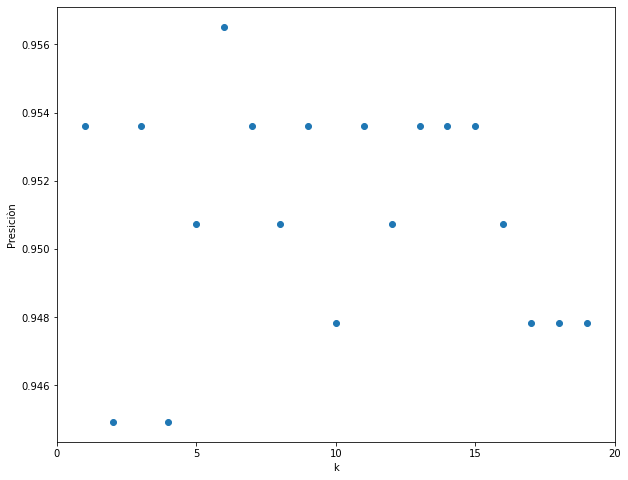

In [95]:
#Eligiendo el mejor vecino
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure(figsize=(10,8))
plt.xlabel('k')
plt.ylabel('Presiciòn')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

## Probando una predicción

In [96]:
# Supongamos que queremos una muestra aleatoria, podemos usar el método sample() de pandas
muestra_aleatoria = df.sample(1)[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Press_kPa']].values

# Escalamos la muestra utilizando el mismo scaler que usamos para el conjunto de entrenamiento
muestra_escalada = scaler.transform(muestra_aleatoria)

# Realizamos la predicción utilizando el modelo KNN entrenado
prediccion = knn.predict(muestra_escalada)

print('Muestra seleccionada:', muestra_aleatoria)
print('Predicción:', prediccion)

Muestra seleccionada: [[-5.   -7.7  81.   99.24]]
Predicción: [0.]


## Regresión logística
En lo que sigue vamos a generar un modelo de regresión logística poder comparar su desempeño frente al de Knn vecinos.

### Escalado con RobustScaler

In [97]:
#Asignamos variables a los datos de entrada y el de salida
X = nuevo_df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Press_kPa']].values
y = nuevo_df['Rain'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Escalamos los datos
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Establecemos nuestro modelo
logre = LogisticRegression()
logre.fit(X_train, y_train)
print('Precisión del clasificador KNN en el conjunto de entrenamiento: {:.2f}'.format(knn.score(X_train, y_train)))
print('Precisión del clasificador KNN en el conjunto de prueba: {:.2f}'.format(knn.score(X_test, y_test)))

Precisión del clasificador KNN en el conjunto de entrenamiento: 0.92
Precisión del clasificador KNN en el conjunto de prueba: 0.94


Generamos la matriz de confusión correspondiente al modelo

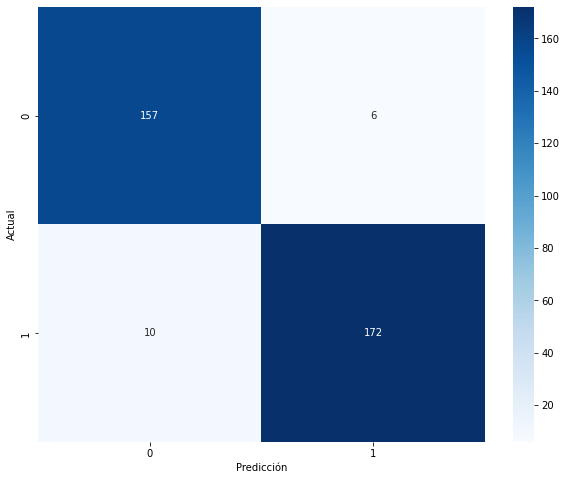

In [98]:
# Realizamos predicciones en el conjunto de prueba
y_pred = logre.predict(X_test)

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión en un mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()


### Escalado con StandardScaler

In [99]:
#Asignamos variables a los datos de entrada y el de salida
X = nuevo_df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Press_kPa']].values
y = nuevo_df['Rain'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Escalamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Establecemos nuestro modelo
logre = LogisticRegression()
logre.fit(X_train, y_train)
print('Precisión del clasificador KNN en el conjunto de entrenamiento: {:.2f}'.format(knn.score(X_train, y_train)))
print('Precisión del clasificador KNN en el conjunto de prueba: {:.2f}'.format(knn.score(X_test, y_test)))

Precisión del clasificador KNN en el conjunto de entrenamiento: 0.95
Precisión del clasificador KNN en el conjunto de prueba: 0.95


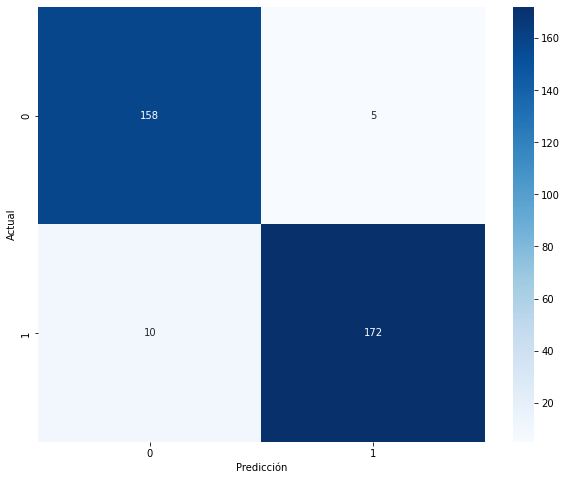

In [100]:
# Realizamos predicciones en el conjunto de prueba
y_pred = logre.predict(X_test)

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión en un mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

Vemos que esta mejora se dá porque ahora nuestro modelo no comete el error de un 'Falso positivo'. Es decir, cuando los datos que se ingresán indican que no va a llover y nuestro modelo predice que lo hará.

## Árboles de decisión
El siguiente modelo a probar va a ser el de árboles de decisión.

### Escalado con RobustScaler

In [101]:
#Asignamos variables a los datos de entrada y el de salida
X = nuevo_df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Press_kPa']].values
y = nuevo_df['Rain'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Escalamos los datos
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Establecemos nuestro modelo
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Precisión del clasificador KNN en el conjunto de entrenamiento: {:.2f}'.format(knn.score(X_train, y_train)))
print('Precisión del clasificador KNN en el conjunto de prueba: {:.2f}'.format(knn.score(X_test, y_test)))

Precisión del clasificador KNN en el conjunto de entrenamiento: 0.92
Precisión del clasificador KNN en el conjunto de prueba: 0.94


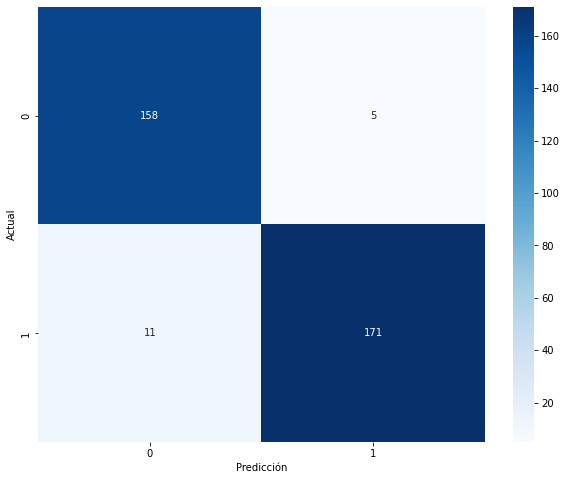

In [102]:
# Realizamos predicciones en el conjunto de prueba
y_pred = tree.predict(X_test)

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión en un mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

### Escalado con StandardScaler

In [103]:
#Asignamos variables a los datos de entrada y el de salida
X = nuevo_df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Press_kPa']].values
y = nuevo_df['Rain'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#Escalamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Establecemos nuestro modelo
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print('Precisión del clasificador KNN en el conjunto de entrenamiento: {:.2f}'.format(knn.score(X_train, y_train)))
print('Precisión del clasificador KNN en el conjunto de prueba: {:.2f}'.format(knn.score(X_test, y_test)))

Precisión del clasificador KNN en el conjunto de entrenamiento: 0.95
Precisión del clasificador KNN en el conjunto de prueba: 0.95


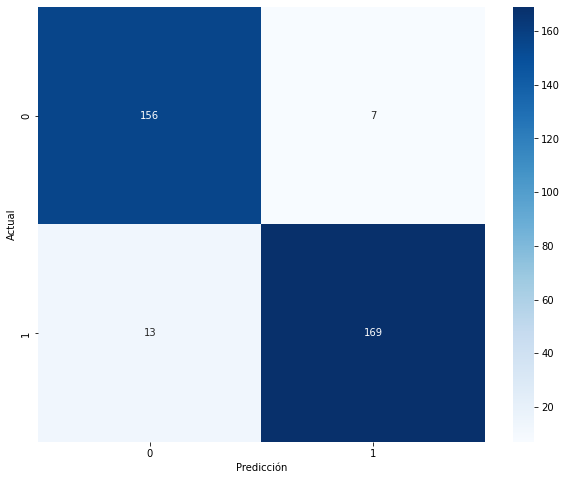

In [104]:
# Realizamos predicciones en el conjunto de prueba
y_pred = tree.predict(X_test)

# Creamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión en un mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

A diferencia de la regresión logística, los árboles de decisión son mejores prediciendo si no va a llover. En cambio, la regresión logística más casos (172) cuando se da el evento de lluvia.